In [1]:
# Group 29
# Assignment 6 | Author: Yash Kumar Sahu | Roll No: CED19I039 
# Assignment 6 | Author: Radhika Mittal | Roll No: CED19I050
# Assignment 6 | Author: Deep Patel | Roll No: ME21D0004

## Libraries


In [2]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math


## Read Lena Image 

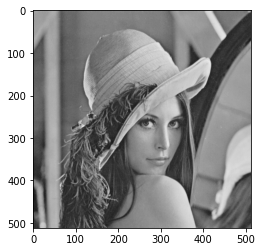

In [3]:
cwd = os.getcwd()                                            # get current directory
img = cv2.imread(cwd+"/Lena.png") 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             # Convert to grayscale
#gray_img=gray_img[80:85,80:85]
plt.imshow(gray_img, cmap='gray', vmin = 0, vmax = 255)


Adding salt and pepper noise


In [4]:
## Function to add salt and pepper noise
def sp_noise(image,prob):
    #prob=prob*0.5
    output = np.copy(image)
    thres = 1 - prob*0.5 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [5]:
## Add sp noise no to input gray image X 10
noise_gray_img=[]
for i in range(1,11):
    noise_gray_img.append(sp_noise(gray_img,0.1*i))

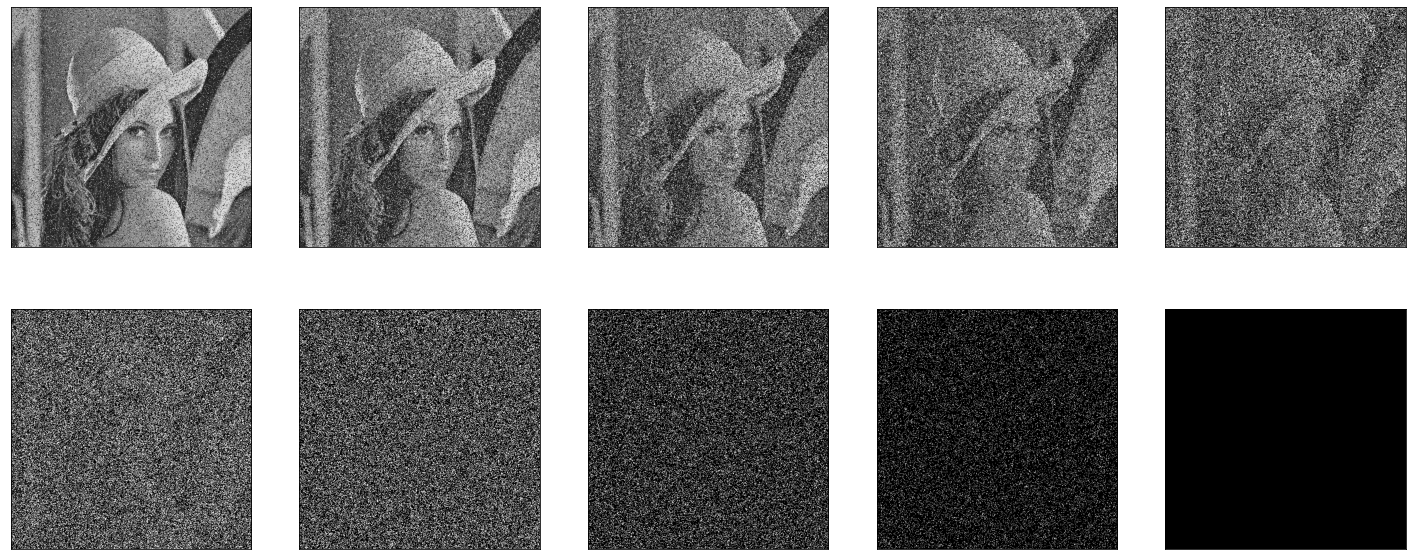

In [6]:
## Display noise image
f = plt.figure()
f.set_figwidth(5*5)
f.set_figheight(2*5)

for i in range(10):
    # display Different Angle
    
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(noise_gray_img[i],  cmap='gray', vmin = 0, vmax = 255)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.subplots_adjust(hspace = 0.25 )
plt.show()  

In [7]:
## Average filter funtion; Don't consider extension
def average_filter(src_img, filter_size):

    output = np.zeros(src_img.shape,np.uint8)
    img_size=len(src_img)
    index=filter_size//2

    for i in range(img_size):
        for j in range(img_size):            
            temp=src_img[(i-index) if i-index+1>0 else i:(i+index+1) if i+index-1<img_size else i,(j-index) if j-index+1>0 else j : (j+index)+1 if j+index-1<img_size else j]
            output[i][j]=round(np.sum(temp*1/np.size(temp)))
            #output[i][j]=round(np.sum(temp*1/(filter_size*filter_size)))   ## with 0 padding
    return output        


In [8]:
## Compute average filter on noise gray img using 3x3 , 5x5 , 7x7 window size
ave_img=[]
ave_img=list(ave_img)
for i in range(10):
    temp=average_filter(noise_gray_img[i], 3)
    ave_img.append(temp)
    temp=average_filter(noise_gray_img[i], 5)
    ave_img.append(temp)
    temp=average_filter(noise_gray_img[i], 7)
    ave_img.append(temp)

In [11]:
## Compute average filter on noise gray img using 3x3 , 5x5 , 7x7 window size
ave_img_builtin=[]
ave_img_builtin=list(ave_img)
for i in range(10):
    temp=cv2.blur(noise_gray_img[i],(3,3))
    ave_img_builtin.append(temp)
    temp=cv2.blur(noise_gray_img[i],(5,5))
    ave_img_builtin.append(temp)
    temp=cv2.blur(noise_gray_img[i],(7,7))
    ave_img_builtin.append(temp)

Using User Defined Function


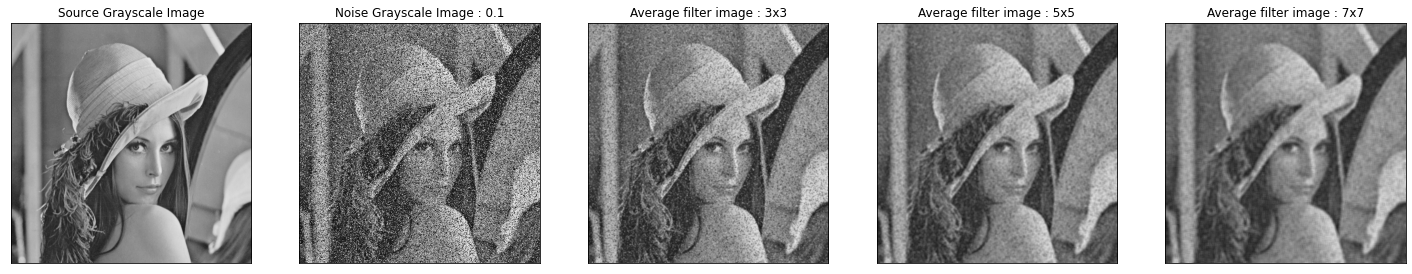

Using Bulitin Function


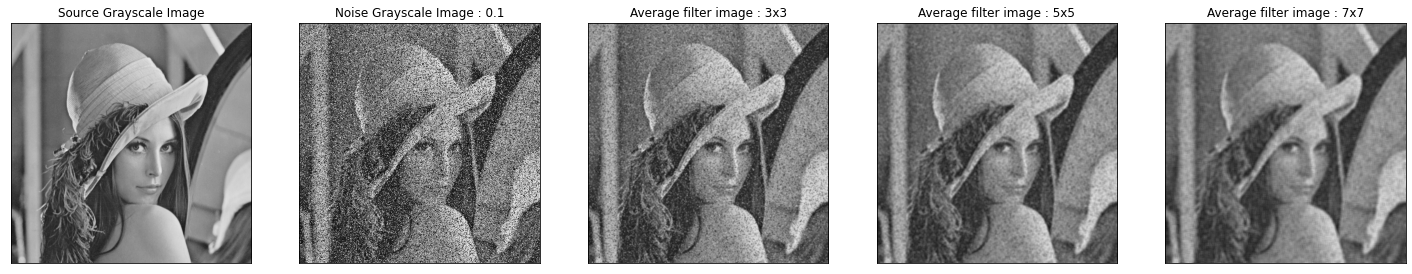

In [14]:
# Display results

print("Using User Defined Function")

f = plt.figure()
f.set_figwidth(1*25)
f.set_figheight(5*25)

ax = plt.subplot(1,5, 1)
plt.imshow(gray_img, cmap='gray', vmin = 0, vmax = 255)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Source Grayscale Image")

ax = plt.subplot(1,5, 2)
plt.imshow(noise_gray_img[1], cmap='gray', vmin = 0, vmax = 255)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Noise Grayscale Image : 0.1")

ax = plt.subplot(1,5, 3)
plt.imshow(ave_img[0], cmap='gray', vmin = 0, vmax = 255)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Average filter image : 3x3")

ax = plt.subplot(1,5, 4)
plt.imshow(ave_img[0+1], cmap='gray', vmin = 0, vmax = 255)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Average filter image : 5x5")

ax = plt.subplot(1, 5, 5)
plt.imshow(ave_img[0+2], cmap='gray', vmin = 0, vmax = 255)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Average filter image : 7x7")

plt.subplots_adjust(hspace = 0.5 )
plt.show()


print("Using Bulitin Function")

# Display results
f = plt.figure()
f.set_figwidth(1*25)
f.set_figheight(5*25)

ax = plt.subplot(1,5, 1)
plt.imshow(gray_img, cmap='gray', vmin = 0, vmax = 255)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Source Grayscale Image")

ax = plt.subplot(1,5, 2)
plt.imshow(noise_gray_img[1], cmap='gray', vmin = 0, vmax = 255)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Noise Grayscale Image : 0.1")

ax = plt.subplot(1,5, 3)
plt.imshow(ave_img_builtin[0], cmap='gray', vmin = 0, vmax = 255)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Average filter image : 3x3")

ax = plt.subplot(1,5, 4)
plt.imshow(ave_img_builtin[0+1], cmap='gray', vmin = 0, vmax = 255)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Average filter image : 5x5")

ax = plt.subplot(1, 5, 5)
plt.imshow(ave_img_builtin[0+2], cmap='gray', vmin = 0, vmax = 255)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Average filter image : 7x7")

plt.subplots_adjust(hspace = 0.5 )
plt.show()

Refer


https://github.com/KiranThomasCherian/Computer-Vision-And-Digital-Image-Processing/blob/main/Assignment%202/QUESTION_1.ipynb